## Using sklearn to predict Future Power Consumption from Previous Power Consumption ##


For all viewing, the purpose of this project is to use two common maching learning methods to predict power usage for the next hour given data on the previous four hours. All data is taken from the U.S. Energy information Administration.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import sklearn as sk
import ast
%matplotlib inline
import matplotlib.pyplot as plt
import scipy as sc
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
import datetime
#from lightgbm import LGBMRegressor

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
# The code was removed by Watson Studio for sharing.

,EBA.US48-ALL.D.H,EBA.SE-ALL.TI.H,EBA.US48-ALL.NG.H,EBA.US48-ALL.TI.H,EBA.NW-ALL.D.H,EBA.NW-ALL.DF.H,EBA.MIDW-ALL.TI.H,EBA.MIDW-ALL.NG.H,EBA.MIDW-ALL.DF.H,EBA.MIDW-ALL.D.H,...,EBA.EEI-ALL.DF.H,EBA.JEA-SOCO.ID.H,EBA.WACM-SRP.ID.H,EBA.NW-MIDW.ID.H,EBA.CEN-TVA.ID.H,EBA.SWPP-TVA.ID.H,EBA.TEPC-GRMA.ID.H,EBA.TEPC-WACM.ID.H,EBA.GRMA-TEPC.ID.H,EBA.WACM-TEPC.ID.H
data,"{'20170818T20Z': 633818, '20170818T19Z': 61786...","{'20170818T05Z': 1392, '20170818T04Z': 1503, '...","{'20170818T07Z': 71611, '20170818T06Z': 92024,...","{'20170818T07Z': -1305, '20170818T06Z': 153, '...","{'20170818T20Z': 50308, '20170818T19Z': 44778,...","{'20170819T07Z': 25329, '20170819T06Z': 39829,...","{'20170818T05Z': -6760, '20170818T04Z': -6940,...","{'20170818T05Z': 78669, '20170818T04Z': 84740,...","{'20170819T05Z': 81496, '20170819T04Z': 87298,...","{'20170818T20Z': 109381, '20170818T19Z': 10780...",...,"{'20150708T05Z': 0, '20150708T04Z': 0, '201507...","{'20150819T04Z': 0, '20150819T03Z': 0, '201508...","{'20151130T07Z': 4, '20151130T06Z': 0, '201511...","{'20151008T07Z': 0, '20151008T06Z': 0, '201510...","{'20150930T05Z': -141, '20150930T04Z': -142, '...","{'20150930T05Z': -141, '20150930T04Z': -142, '...","{'20150902T07Z': 212, '20150902T06Z': 464, '20...","{'20150902T07Z': -282, '20150902T06Z': -320, '...","{'20150812T07Z': -253, '20150812T06Z': -338, '...","{'20150719T07Z': 335, '20150719T06Z': 338, '20..."
description,Timestamps follow the ISO8601 standard (https:...,Timestamps follow the ISO8601 standard (https:...,Timestamps follow the ISO8601 standard (https:...,Timestamps follow the ISO8601 standard (https:...,Timestamps follow the ISO8601 standard (https:...,Timestamps follow the ISO8601 standard (https:...,Timestamps follow the ISO8601 standard (https:...,Timestamps follow the ISO8601 standard (https:...,Timestamps follow the ISO8601 standard (https:...,Timestamps follow the ISO8601 standard (https:...,...,Timestamps follow the ISO8601 standard (https:...,Timestamps follow the ISO8601 standard (https:...,Timestamps follow the ISO8601 standard (https:...,Timestamps follow the ISO8601 standard (https:...,Timestamps follow the ISO8601 standard (https:...,Timestamps follow the ISO8601 standard (https:...,Timestamps follow the ISO8601 standard (https:...,Timestamps follow the ISO8601 standard (https:...,Timestamps follow the ISO8601 standard (https:...,Timestamps follow the ISO8601 standard (https:...
end,20170818T20Z,20170818T05Z,20170818T07Z,20170818T07Z,20170818T20Z,20170819T07Z,20170818T05Z,20170818T05Z,20170819T05Z,20170818T20Z,...,20150708T05Z,20150819T04Z,20151130T07Z,20151008T07Z,20150930T05Z,20150930T05Z,20150902T07Z,20150902T07Z,20150812T07Z,20150719T07Z
f,H,H,H,H,H,H,H,H,H,H,...,H,H,H,H,H,H,H,H,H,H
geoset_id,EBA.D.H,EBA.TI.H,EBA.NG.H,EBA.TI.H,EBA.D.H,EBA.DF.H,EBA.TI.H,EBA.NG.H,EBA.DF.H,EBA.D.H,...,EBA.DF.H,EBA.ID.H,EBA.ID.H,EBA.ID.H,EBA.ID.H,EBA.ID.H,EBA.ID.H,EBA.ID.H,EBA.ID.H,EBA.ID.H


The data used for these data sets is imported. Below it will be converted into a convenient format.

In [4]:
time = []
power = []
#df.sort_index(inplace = True)
df = df.T
df.head()

,data,description,end,f,geoset_id,last_updated,name,start,units
EBA.US48-ALL.D.H,"{'20170818T20Z': 633818, '20170818T19Z': 61786...",Timestamps follow the ISO8601 standard (https:...,20170818T20Z,H,EBA.D.H,2017-08-18T17:05:22-04:00,"Demand for United States Lower 48 (region), Ho...",20150701T00Z,megawatthours
EBA.SE-ALL.TI.H,"{'20170818T05Z': 1392, '20170818T04Z': 1503, '...",Timestamps follow the ISO8601 standard (https:...,20170818T05Z,H,EBA.TI.H,2017-08-18T17:05:22-04:00,Total net actual interchange for Southeast (re...,20150701T00Z,megawatthours
EBA.US48-ALL.NG.H,"{'20170818T07Z': 71611, '20170818T06Z': 92024,...",Timestamps follow the ISO8601 standard (https:...,20170818T07Z,H,EBA.NG.H,2017-08-18T17:05:22-04:00,Net generation for United States Lower 48 (reg...,20150701T00Z,megawatthours
EBA.US48-ALL.TI.H,"{'20170818T07Z': -1305, '20170818T06Z': 153, '...",Timestamps follow the ISO8601 standard (https:...,20170818T07Z,H,EBA.TI.H,2017-08-18T17:05:22-04:00,Total net actual interchange for United States...,20150701T00Z,megawatthours
EBA.NW-ALL.D.H,"{'20170818T20Z': 50308, '20170818T19Z': 44778,...",Timestamps follow the ISO8601 standard (https:...,20170818T20Z,H,EBA.D.H,2017-08-18T17:05:22-04:00,"Demand for Northwest (region), Hourly",20150701T00Z,megawatthours


Below we make two lists for the data processing.

In [5]:
for i, k in df['data'][0].items():
    time.append(i)
    power.append(k)
time = time[::-1]
power = power[::-1]

In [6]:
print(len(time), len(power))

18717 18717


In [7]:
time = pd.to_datetime(time)


In [8]:
dfpow = pd.DataFrame({'Time':time, 'Power':power})
dfpow.Time =pd.to_datetime(dfpow.Time)
dfpow.set_index('Time', inplace = True)
#dfpow.dtypes
dfpow.head()

,Power
Time,
2015-07-01 00:00:00+00:00,600819
2015-07-01 01:00:00+00:00,585365
2015-07-01 02:00:00+00:00,571857
2015-07-01 03:00:00+00:00,548363
2015-07-01 04:00:00+00:00,506969


Below we will make plots for the whole time series, one day, one week, one month, and one year.

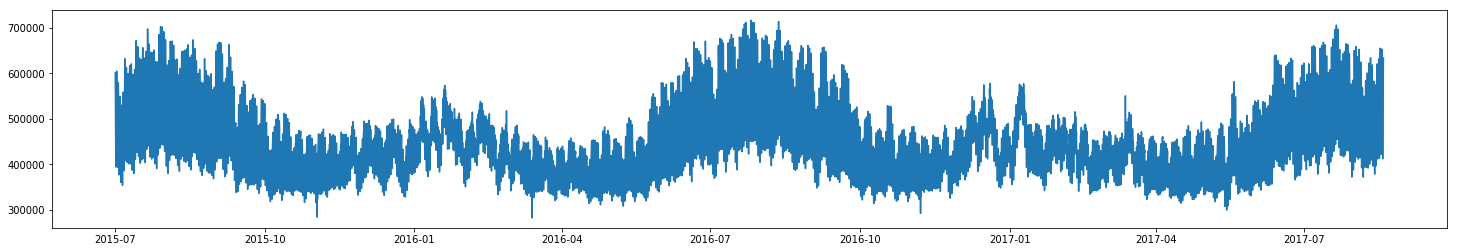

In [10]:
fig = plt.figure()
ax = plt.axes()

mpl.rcParams['figure.figsize'] = (25, 4)
#plt.figure(figsize = (25,5))

ax.plot(time, power);

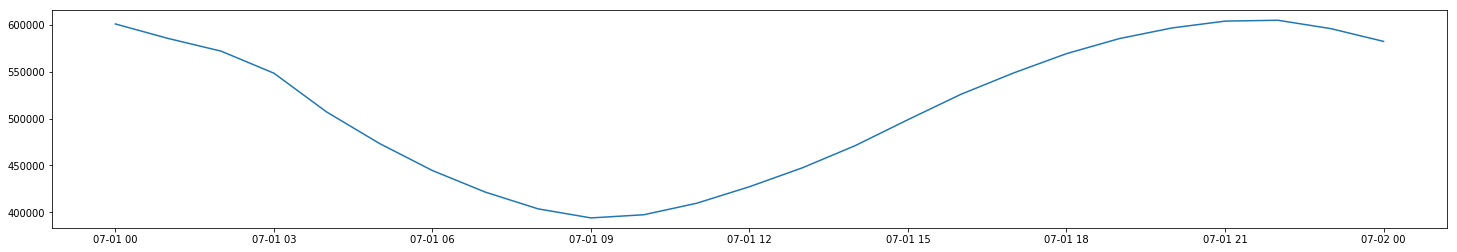

In [11]:
fig = plt.figure()
ax = plt.axes()

#mpl.rcParams['figure.figsize'] = (25, 4)

#plt.figure(figsize = (10,5))

ax.plot(time[:25], power[:25]);

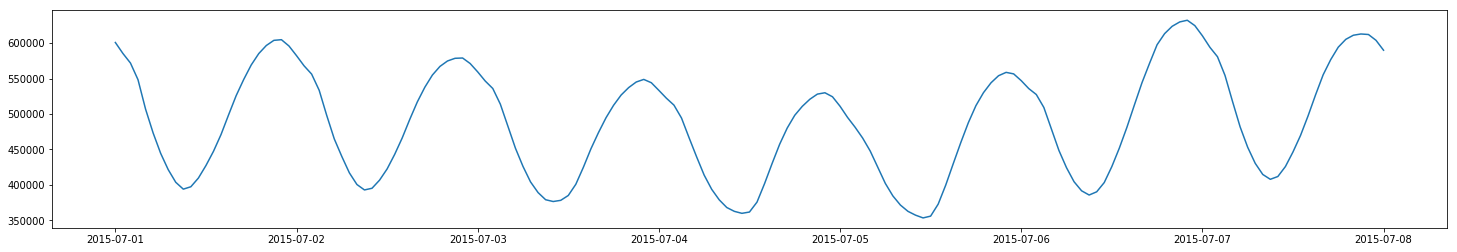

In [12]:
fig = plt.figure()
ax = plt.axes()

#mpl.rcParams['figure.figsize'] = (25, 4)

#plt.figure(figsize = (10,5))

ax.plot(time[:7*24 +1], power[:7*24 +1]);

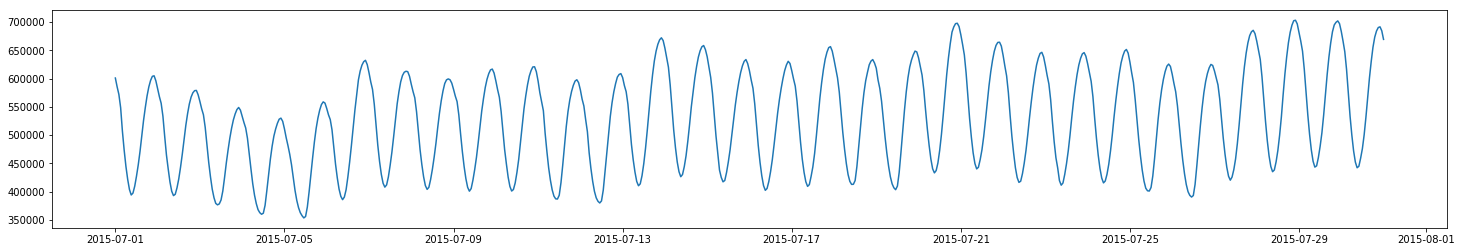

In [13]:
fig = plt.figure()
ax = plt.axes()

mpl.rcParams['figure.figsize'] = (25, 4)

#plt.figure(figsize = (10,5))

ax.plot(time[:721], power[:721]);

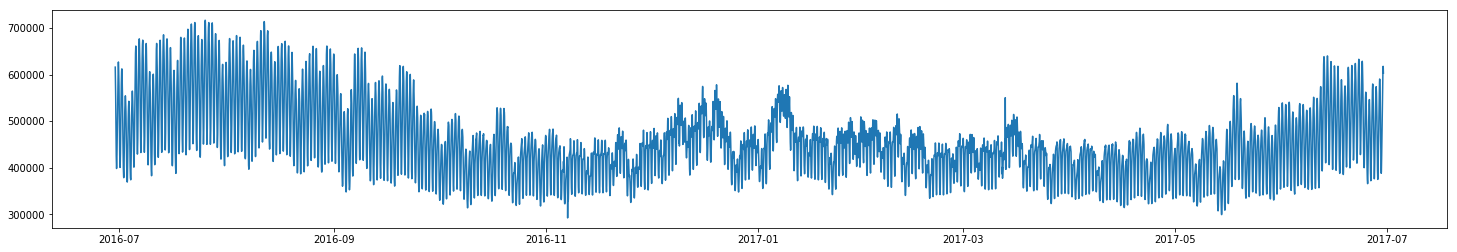

In [14]:
fig = plt.figure()
ax = plt.axes()

mpl.rcParams['figure.figsize'] = (25, 4)

#plt.figure(figsize = (10,5))

ax.plot(time[8760:2*8760 + 1], power[8760:2*8760 + 1]);

In [15]:
faux_t = np.arange(0,len(time))
print(len(faux_t))

18717


Below we will use statsmodels to perform a Dickey-Fuller test for stationarity in the time series. A stationary times series can be broken down more easily in for our models without much further change. see here for more https://en.wikipedia.org/wiki/Stationary_process

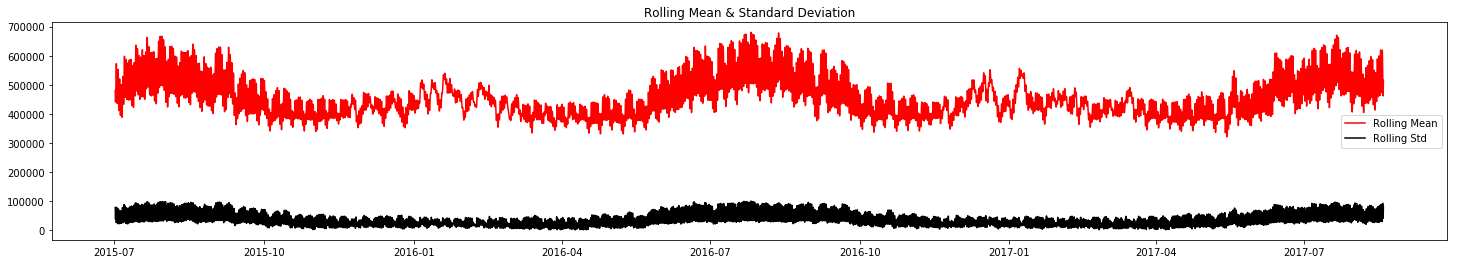

Results of Dickey-Fuller Test:
Test Statistic                -6.209709e+00
p-value                        5.545942e-08
#Lags Used                     4.500000e+01
Number of Observations Used    1.867100e+04
Critical Value (1%)           -3.430700e+00
dtype: float64
Test Statistic                -6.209709e+00
p-value                        5.545942e-08
#Lags Used                     4.500000e+01
Number of Observations Used    1.867100e+04
Critical Value (1%)           -3.430700e+00
Critical Value (5%)           -2.861695e+00
dtype: float64
Test Statistic                -6.209709e+00
p-value                        5.545942e-08
#Lags Used                     4.500000e+01
Number of Observations Used    1.867100e+04
Critical Value (1%)           -3.430700e+00
Critical Value (5%)           -2.861695e+00
Critical Value (10%)          -2.566852e+00
dtype: float64


In [29]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries,q):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()


    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries[q], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)

test_stationarity(dfpow, 'Power')

18717


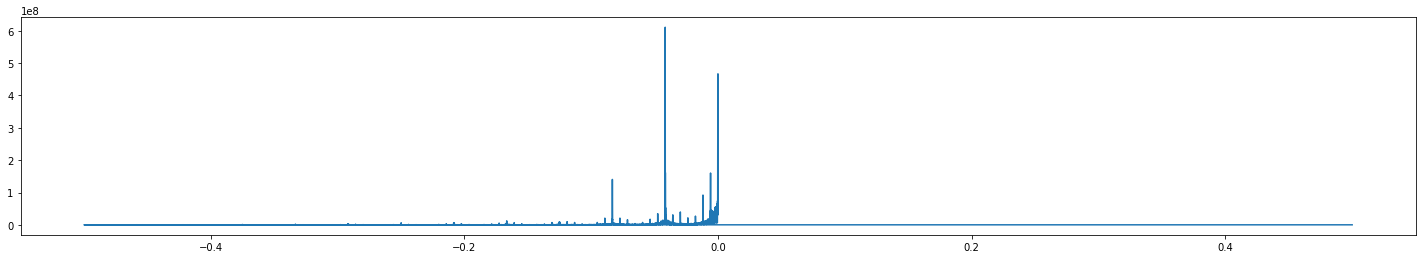

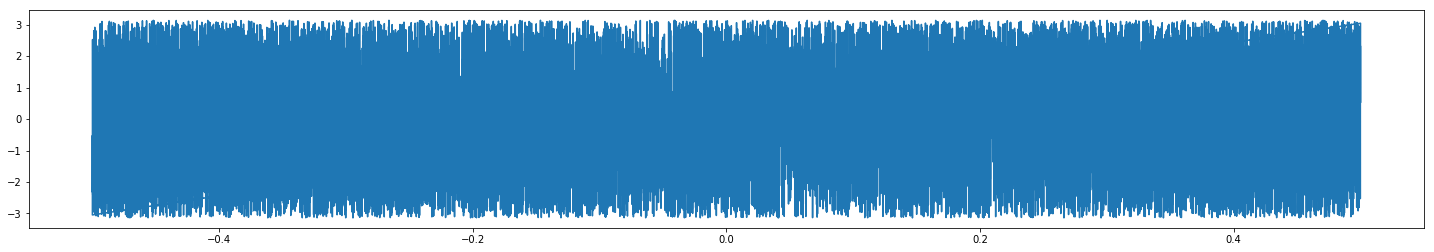

In [19]:
import pylab
mag = np.fft.fft(power)
freq = np.fft.fftfreq(len(power), 1)

not0 = [i for i in mag if i != 0]
print(len(not0))
  
pylab.figure()
pylab.plot( freq[int(len(power)/2):], np.abs(mag[int(len(power)/2):]) )
#pylab.plot(freq, np.abs(mag))
pylab.figure()
pylab.plot(freq, np.angle(mag) )
pylab.show()

Below we divide the data into vectors of length four for the four hours preceding 

In [28]:
X_train_4 = []
#y_train = []
X_test_4 = []

y_train_4 = []
y_test_4 = []

def make_sets(grp, in_list, ox_train, ox_test, oy_train, oy_test):
    for i in range(0,int(.8*len(in_list))):
        ox_train.append(in_list[i:i + grp])
    for i in range(int(.8*len(in_list)),len(in_list) - grp - 1):
        ox_test.append(in_list[i:i + grp])
    for i in in_list[grp:int(.8*len(in_list)) + grp]:
        oy_train.append(i)
    for i in in_list[int(.8*len(in_list)) + grp:len(in_list) - 1:]:
        oy_test.append(i)

make_sets(4, power, X_train_4, X_test_4, y_train_4, y_test_4)


print(len(X_test_4), len(y_test_4), len(X_train_4), len(y_train_4), X_train_4[1], y_train_4[0], X_test_4[len(X_test_4)-1], y_test_4[len(y_test_4) -2])

3739 3739 14973 14973 [585365, 571857, 548363, 506969] 506969 [524297, 552177, 577349, 599501] 599501


Here we will train two models, a linear regression model and ridge regression model. We will see how each performs.

In [21]:
from sklearn import linear_model
clf = linear_model.LinearRegression(normalize = True)
clf.fit (X_train_4, y_train_4)
print(clf.coef_, clf.score)

[ 0.1548783  -0.14050687 -1.02544636  1.98211599] <bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)>


In [22]:

mae = sk.metrics.mean_absolute_error(y_test_4, clf.predict(np.array(X_test_4)))
#rmse = np.sqrt(mse)
#print(f'RMSE = {rmse:4.2f}', mse)

print(mae, mae/np.mean(power))


3452.468796044884 0.0075590621706655104


In [23]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


clf2 = Ridge()
pars = {'alpha': [.001, .001, .01, .1, 1, 2, 5]}
CV_clf2 = GridSearchCV(estimator=clf2, param_grid = pars, scoring = 'neg_mean_squared_error', cv= 5)
CV_clf2.fit(X_train_4, y_train_4)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.001, 0.01, 0.1, 1, 2, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [24]:
clf2 = Ridge(alpha = 1.0)
clf2.fit(X_train_4, y_train_4)
#pred = clf2.predict(np.array(X_test_4))
clf2.score(X_test_4, np.asarray(y_test_4))

0.996829135685681

Note that both models seem to perform exceedingly well. For a stationary times series over a short period this is normal. In the coefficients for the linear model it should be noted the prediction comes out to be about the same as the preceding hour assuming all values are similar.

Below we make a test data set. we will do this with data from the north eastern U.S. for power demand. The measurements are taken over the same range of intervals of one hour in the same time period. It will be important to note if there is any significant loss of generality due to climatic differences.

In [25]:
time_NE =[]
power_NE = []

for i in df[df.index == 'EBA.NE-ALL.D.H']['data']:
    time_NE.append(i)
    power_NE.append(k)
time_NE = time[::-1]
power_NE = power[::-1]
pd.to_datetime(time_NE)

X_train_4_NE = []
#y_train = []
X_test_4_NE = []

y_train_4_NE = []
y_test_4_NE = []

def make_sets(grp, in_list, ox_train, ox_test, oy_train, oy_test):
    for i in range(0,int(.8*len(in_list))):
        ox_train.append(in_list[i:i + grp])
    for i in range(int(.8*len(in_list)),len(in_list) - grp - 1):
        ox_test.append(in_list[i:i + grp])
    for i in in_list[grp:int(.8*len(in_list)) + grp]:
        oy_train.append(i)
    for i in in_list[int(.8*len(in_list)) + grp:len(in_list) - 1:]:
        oy_test.append(i)

make_sets(4, power_NE, X_train_4_NE, X_test_4_NE, y_train_4_NE, y_test_4_NE)


print(len(X_test_4_NE), len(y_test_4_NE), len(X_train_4_NE), len(y_train_4_NE), X_train_4_NE[1], y_train_4_NE[0])
#, X_test_4[len(X_test_4)-1], y_test_4[len(y_test_4) -2])

3739 3739 14973 14973 [617869, 599501, 577349, 552177] 552177


In [26]:

mae = sk.metrics.mean_absolute_error(y_test_4_NE, clf.predict(np.array(X_test_4_NE)))
#rmse = np.sqrt(mse)
#print(f'RMSE = {rmse:4.2f}', mse)

print(mae, mae/np.mean(power_NE))

4178.133466022677 0.009147880109208955


In [27]:
clf2 = Ridge(alpha = 1.0)
clf2.fit(X_train_4_NE, y_train_4_NE)
#pred = clf2.predict(np.array(X_test_4))
clf2.score(X_test_4_NE, np.asarray(y_test_4_NE))

0.9944871341851341

In conclusion the models both were able to predict an hour's advanced demand relatively well. However this is normal for a stationary time series and predictions further into the future are a better measure of success.